<a href="https://colab.research.google.com/github/Tejaswini120805/Machinelearninglab_050/blob/main/MNSITML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

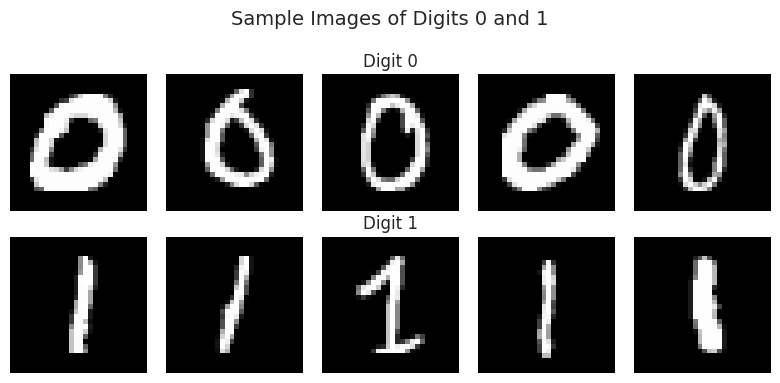

Model Accuracy: 99.95%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



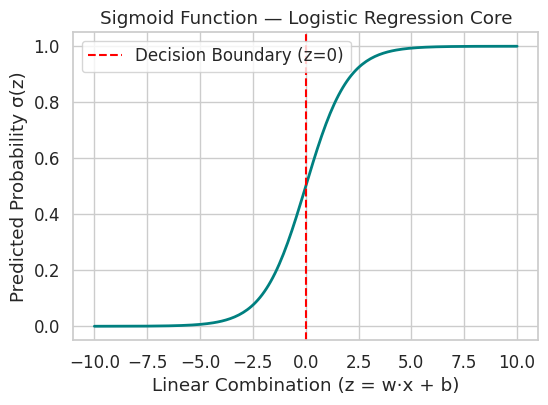

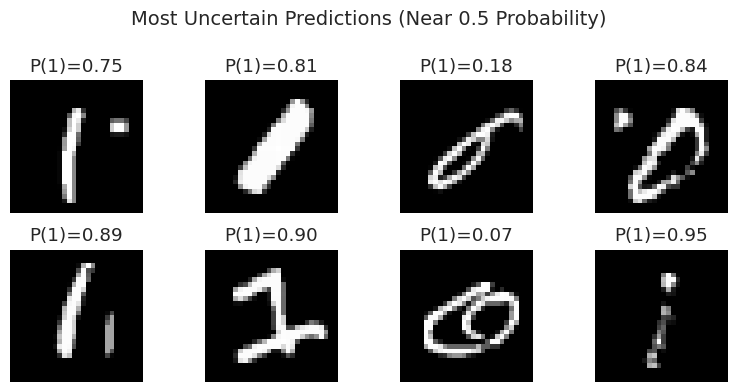

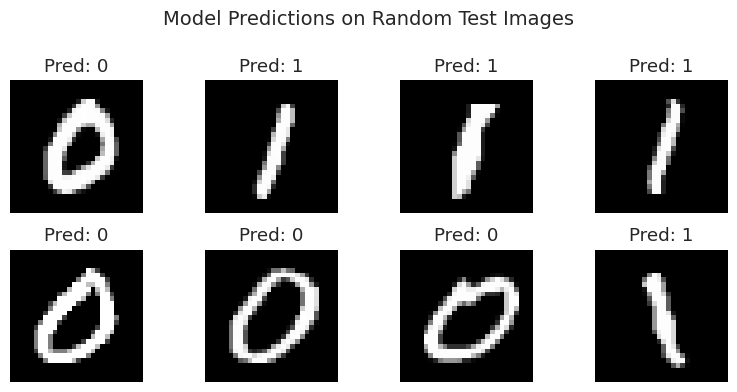

Accuracy: 99.95%


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (7, 4)

# Load MNIST 0 vs 1
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")
train_df = train_df[train_df['label'].isin([0, 1])]
test_df = test_df[test_df['label'].isin([0, 1])]

X_train = train_df.iloc[:, 1:].values / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values

# Sample Images
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, label in enumerate([0, 1]):
    samples = train_df[train_df['label'] == label].sample(5, random_state=42)
    for j, (_, row) in enumerate(samples.iterrows()):
        axes[i, j].imshow(np.array(row[1:]).reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')
        if j == 2:
            axes[i, j].set_title(f"Digit {label}", fontsize=12)
plt.suptitle("Sample Images of Digits 0 and 1", fontsize=14)
plt.tight_layout()
plt.show()

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")
print(classification_report(y_test, y_pred))

# Sigmoid Curve
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid, color='teal', linewidth=2)
plt.axvline(0, color='red', linestyle='--', label='Decision Boundary (z=0)')
plt.title("Sigmoid Function — Logistic Regression Core")
plt.xlabel("Linear Combination (z = w·x + b)")
plt.ylabel("Predicted Probability σ(z)")
plt.legend()
plt.grid(True)
plt.show()

# Most Uncertain Predictions
uncertain_idx = np.argsort(np.abs(y_prob - 0.5))[:8]

plt.figure(figsize=(8, 4))
for i, idx in enumerate(uncertain_idx):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"P(1)={y_prob[idx]:.2f}")
    plt.axis('off')
plt.suptitle("Most Uncertain Predictions (Near 0.5 Probability)", fontsize=14)
plt.tight_layout()
plt.show()

# Random Test Predictions
np.random.seed(42)
indices = np.random.choice(len(X_test), 8, replace=False)

plt.figure(figsize=(8, 4))
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Model Predictions on Random Test Images", fontsize=14)
plt.tight_layout()
plt.show()

print(f"Accuracy: {acc*100:.2f}%")
